<br>
<center><img title="PROMISE" src="https://drive.google.com/uc?id=1mkkRuqmsPouCu2tnd6o_YwbdGgXMHN5o" height=125px></center>


---
# <center> <b>Deep Learning - Perceptrón Multicapa (MLP)</b> </center>
---

<br>
<br>
**IMPORTANTE**:
- En este Jupyter Notebook  hay líneas de código incompletas. Para que se ejecuten correctamente hay que rellenar los huecos donde veas **??**
- Responde las preguntas en este Jupyter Notebook

## **<u>Ejercicio 1: CONJUNTO DE DATOS MNIST</u>**

En este primer ejercicio de deep learning se va a trabajar con el conjunto de datos **MNIST**. El set de datos **MNIST** es un conjunto de  70000 imágenes de $28 \times 28$ pixels (escala de grises) que contienen números manuscritos junto con la etiqueta (clase) solución del número codificado (clase esperada o ground truth).

El objetivo de dicha red va a ser el de **identificar dígitos del 0 al 9 escritos de forma manual** como los que se ven en la siguiente imagen:

<br>
<p align="center">
<img width="600" src="https://drive.google.com/uc?id=1BCnpXpotcLZvPaVyK-7M6Xrhs2gdl3L3">
</p>


Cabe destacar que, por convención, MNIST dispone de una división específica en conjuntos de **entrenamiento (train) y test**. Este dataset es el "Hola Mundo" del aprendizaje profundo y es de gran utilidad para validar nuevos métodos propuestos ya que hace de *benchmark* permitiendo establecer comparativas justas. Debido a su gran popularidad, las principales librerias destinadas al aprendizaje profundo permiten cargarlo directamente en nuestro código.

In [ ]:
# Cargar librerías numpy, matplotlib y tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Cargar conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Vamos a comprobar la estructura de los datos de ambos conjuntos: número de ejemplos, tamaño de la imágenes, valor mínimo/máximo de una imagen y tamaño de las etiquetas.

In [ ]:
# Organización de los datos
print('Número de ejemplos/observaciones (imágenes) del conjunto de entrenamiento:', len(y_train))
print('Número de ejemplos/observaciones (imágenes) del conjunto de test:', len(y_test))
print('Las imágenes son arrays de tamaño:', x_train[0].shape)
print('Para la imagen 0, su valor mínimo es', x_train[0].min(), 'y su valor máximo es', x_train[0].max())
print('Las etiquetas son de tamaño', y_train[0].shape, ', es decir, tienen 1 valor que para el ejemplo 0 vale', y_train[0])

Número de ejemplos/observaciones (imágenes) del conjunto de entrenamiento: 60000
Número de ejemplos/observaciones (imágenes) del conjunto de test: 10000
Las imágenes son arrays de tamaño: (28, 28)
Para la imagen 0, su valor mínimo es 0 y su valor máximo es 255
Las etiquetas son de tamaño () , es decir, tienen 1 valor que para el ejemplo 0 vale 5


Vamos a comprobar si las clases están balanceadas (es decir, se tiene aproximadamente el mismo número de ejemplos en cada clase) en los conjuntos de datos de entrenamiento y test.

In [ ]:
def numEjemplosPorClase(y):
  numClases = np.unique(y)
  for clase in numClases:
    numEjemplosClase = np.sum(y == clase)
    print('La proporción de ejemplos para la clase %d es %.2f' %(clase, numEjemplosClase/len(y)))

# Comprobar si las clases están balanceadas (es decir, se tiene aproximadamente el mismo número de ejemplos en cada clase) en los conjuntos de datos de entrenamiento y test
print('-Conjunto de datos de entrenamiento')
numEjemplosPorClase(y_train)
print('\n-Conjunto de datos de test')
numEjemplosPorClase(y_test)

-Conjunto de datos de entrenamiento
La proporción de ejemplos para la clase 0 es 0.10
La proporción de ejemplos para la clase 1 es 0.11
La proporción de ejemplos para la clase 2 es 0.10
La proporción de ejemplos para la clase 3 es 0.10
La proporción de ejemplos para la clase 4 es 0.10
La proporción de ejemplos para la clase 5 es 0.09
La proporción de ejemplos para la clase 6 es 0.10
La proporción de ejemplos para la clase 7 es 0.10
La proporción de ejemplos para la clase 8 es 0.10
La proporción de ejemplos para la clase 9 es 0.10

-Conjunto de datos de test
La proporción de ejemplos para la clase 0 es 0.10
La proporción de ejemplos para la clase 1 es 0.11
La proporción de ejemplos para la clase 2 es 0.10
La proporción de ejemplos para la clase 3 es 0.10
La proporción de ejemplos para la clase 4 es 0.10
La proporción de ejemplos para la clase 5 es 0.09
La proporción de ejemplos para la clase 6 es 0.10
La proporción de ejemplos para la clase 7 es 0.10
La proporción de ejemplos para la cl

Vamos a visualizar las dos primeras imágenes de train y de test para comprobar que son diferentes.

In [ ]:
# Función para visualizar un ejemplo (con su etiqueta)
def visualizar_digito(datos, etiquetas, num):
  plt.figure(figsize=(2, 2), dpi=80) # Esta línea es para que el plot sea más pequeño
  image = datos[num]
  label = etiquetas[num]
  # Mostrar
  plt.title('Ejemplo: %d,  Etiqueta = %d \n' % (num, label))
  plt.imshow(image, cmap='gray')
  plt.show()

- Valor del ejemplo 0 para train y test



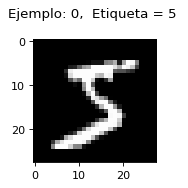

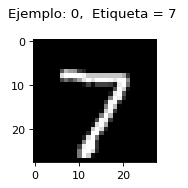



- Valor del ejemplo 1 para train y test


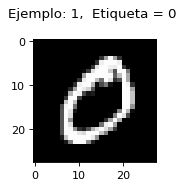

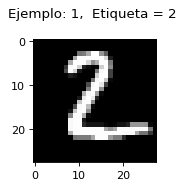

In [ ]:
print('- Valor del ejemplo 0 para train y test\n')
visualizar_digito(x_train, y_train, 0)
visualizar_digito(x_test, y_test, 0)

print('\n\n- Valor del ejemplo 1 para train y test')
visualizar_digito(x_train, y_train, 1)
visualizar_digito(x_test, y_test, 1)

### **One-hot encoding**
**¿Qué es la codificación one-hot encoding?**

La codificación one-hot encoding, también conocida como variables Dummy, es un método para convertir las variables categóricas en varias columnas binarias, en las que un 1 indica que esa fila que pertenece a esa categoría.

Pongamos el siguiente ejemplo, se tienen imágenes donde aparece un perro, un gato, una tortuga o un pez. Las etiquetas de estas imágenes serán "perro, "gato", "tortuga", "pez". No obstante, estas etiquetas están en lenguaje "humano". En lenguaje "máquina", concretament one-hot encoding, se tendría lo siguiente:

<img width="750" src="https://drive.google.com/uc?id=13nV4q-lCTZ69zf0A8KBWAhyacxSyxfbI">


De esta manera se consigue que la suma de cada fila sea 1.

Con el siguiente código podemos codificar (y descodificar) one-hot encoding:

In [ ]:
from sklearn.preprocessing import OneHotEncoder # Librería scikit-learn (alias sklearn)
ohe = OneHotEncoder(sparse=False)

def codificar_onehot(labels):
  labels_encode = ohe.fit_transform(labels.reshape(-1, 1))
  return labels_encode

def decodificar_onehot(labels):
  labels_decode = ohe.inverse_transform(labels).ravel()
  return labels_decode

In [ ]:
y_train_onehot = codificar_onehot(y_train)
y_test_onehot = codificar_onehot(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Ejemplo de cómo recuperar la etiqueta original
y_recuperada = decodificar_onehot(y_train_onehot)

In [ ]:
# Comparemos las diferencias entre las etiquetas originales y las convertidas a One-Hot encoding (y también recuperadas)
print('Etiquetas originales:\n', y_train[0:3])
print('\nEtiquetas en One-hot encoding:\n', y_train_onehot[0:3])
print('\nEtiquetas en One-hot encoding recuperadas:\n', y_recuperada[0:3])

Etiquetas originales:
 [5 0 4]

Etiquetas en One-hot encoding:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Etiquetas en One-hot encoding recuperadas:
 [5 0 4]


### **Label Encoding**

Se trata de otra forma de codificar las variables categóricas. En este caso se le asocia un número a cada etiqueta. Por ejemplo, las salidas esperadas del conjunto de datos MNIST están en codificadas con label encoding. Lo común es usar one-hot encoding pero es importante saber que existe esta otra forma.

<img width="700" src="https://drive.google.com/uc?id=1XQOAFUqTieCGVANZyTjVYSid80ZKjKwf">


In [ ]:
# OTRO TIPO DE CODIFICACIÓN = LABEL ENCODING ---> NO LA VAMOS A USAR (por ahora)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def codificar_label(labels):
  labels_encode = le.fit_transform(labels)
  return labels_encode

def decodificar_label(labels):
  labels_decode = le.inverse_transform(labels)
  return labels_decode

In [ ]:
# Ejemplo (label encoding)
y_etiquetasOriginales = ["Madrid", "Madrid", "Tokyo", "Amsterdam"];
y_labelEncoding = codificar_label(y_etiquetasOriginales)
y_etiquetasRecuperadas = decodificar_label(y_labelEncoding)

print('Etiquetas originales: \n', y_etiquetasOriginales)
print('Etiquetas en Label encoding: \n', y_labelEncoding)
print('Etiquetas en Label encoding recuperada: \n', y_etiquetasRecuperadas)

Etiquetas originales: 
 ['Madrid', 'Madrid', 'Tokyo', 'Amsterdam']
Etiquetas en Label encoding: 
 [1 1 2 0]
Etiquetas en Label encoding recuperada: 
 ['Madrid' 'Madrid' 'Tokyo' 'Amsterdam']


<br>
<br>

### Programar una Red neuronal artificial (ANN) por el **MÉTODO FUNCIONAL**

<img width="500" src="https://cdn-images-1.medium.com/max/550/1*pO5X2c28F1ysJhwnmPsy3Q.gif">



Vamos a crear un **perceptrón multicapa** de tres capas. Con la idea de ir cogiendo práctica en **programar orientado a objetos** (es decir, con clases), se va a **crear una clase** de una red neuronal artificial (ANN) y en esta clase se define una función que construye el modelo.

Como puedes ver la siguiente celda es el esqueleto de una red neuronal medio montada. Encontrarás interrogantes en los lugares donde tienes que rellenar código. Ayuda de Keras: https://www.tensorflow.org/api_docs/python/tf/keras
1. Pon el tamaño de la imagen en **Input**
2. Pon un total de **128 neuronas** en la primera capa oculta (**Dense**) y actívala con **'relu'**. Podría ser cualquier otra función de activación pero por norma siempre se usa relu en las capas ocultas para evitar el VANISH GRADIENT.
3. Desconecta un 20% de neuronas en la capa de **Dropout**.
4. Establece otras **128 neuronas** en la siguiente capa densa y no la actives todavía.
5. Actívala con una función **'relu'**.
6. La última capa, la de **output**, será una capa de 10 neuronas. Este número no es trivial sino que se fija con la cantidad de clases a predecir. Como en este caso tenemos números de 0 al 9 hay 10 clases, por lo tanto 10 neuronas. Actívala con **'softmax'**.
7. Genera el modelo especificando como entradas la variable asociada a la capa **Input** y como salidas la variable asociada a la capa de salida.
8. Finalmente compila el modelo con el optimizador **Adam** y con un learning_rate de 0.1. La función de pérdida va a ser **'categorical_crossentropy'** porque las salidas esperadas están codificadas con one-hot encoding y las métricas serán **'accuracy'**.



In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam # Existen otros optimizadores como SGD y RMSprop

class ANN():

  def build_model():

    # Función de entrada donde definimos el tamaño del vector o imagen de entrada
    inputs = Input((28, 28)) # Rellenar con el tamaño de las imágenes del MNIST.
                             # Fíjate que las imágenes son en escala de grises (2D)
                             # y por eso sólo hay dos posiciones en el input

    # Flatten estira la imagen en un vector 1D
    flat = Flatten()(inputs) # En la foto sería la capa AMARILLA

    # Capas ocultas
    dense = Dense(128, activation='relu')(flat) # Primera capa oculta (en la figura sería la primera capa ROJA)
    drop = Dropout(0.2)(dense) # Dropout lo que hace es desconectar neuronas, se da un valor de 0 a 1
                               # que corresponde con la probabilidad de desconectar una neurona
    dense = Dense(128)(drop) # Segunda capa oculta (en la figura sería la segunda capa ROJA)
    dense = Activation('relu')(dense) # Función de activación de las neuronas de esa capa

    # Capa de salida
    output = Dense(10, activation='softmax')(dense)

    # Genera el modelo
    model = Model(inputs=inputs, outputs=output)

    # Se compila el modelo donde se dice qué optimizador (con qué tasa de aprendizaje), función de pérdida y métricas usaremos
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Ahora vamos a crear una instancia (objeto) de la clase ANN llamando a la función que construye el modelo. Y vamos a ver la estructura creada con la función interna SUMMARY que habrá heredado nuestra clase.

In [ ]:
ann = ANN.build_model()
ann.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290

Como vemos, nuestro modelo tiene un output shape de la entrada [(None, 28, 28)], que cuando llamemos al entrenamiento será [(tamaño_batch, 28, 28)]. Tensorflow pone None cuando generamos la arquitectura porque no sabe de cuánto será el tamaño del batch (lote). Este valor se define en el entrenamiento. Si no lo definimos será el número total de imágenes del conjunto de datos del entrenamiento.

A continuación hemos hecho FLATTEN, es decir, hemos estirado la imagen en un vector 28*28 = 784. Tras esto hemos lanzado 128 neuronas en una capa dense, hemos desconectado (dropout) el 20%, otra capa dense de 128 neuronas y finalmente activado con una relu. La capa final consta de una capa dense de 10 neuronas ya que se tienen 10 clases.

**PREGUNTA 1: Explica el número de parámetros a entrenar de cada capa (usa el nombre de cada capa definido en la primera columna) de la tabla anterior.**

**RESPUESTA:**

La capa "input_1" no tiene parámetros entrenables, son los datos de entrada.

La capa "flatten" es la capa de entrada hecha 1D, por lo tanto tampoco tiene datos de entrada.

La capa "dense" tiene como parámetros entrenables entradas x (neuronas + sesgo) ->  128 x (28 x 28 + 1) = 100480.

La capa "dropout" no tiene parámetros entrenables, es la desconexión aleatoria de neuronas para evitar sobreajuste.

La capa "dense_1" tiene como parámetros entrenables entradas x (neuronas + sesgo) = 128 x (128 + 1) = 16512.

La capa "activation" es la funcion de activación (RELU en este caso).

La capa de salida tiene como parámetros entrenables (entradas x neuronas) + neuronas -> 10 x (128 + 1) = 1290.

Vamos a comprobar que el 20% final del conjunto de entrenamiento tiene las clases balanceadas porque esos ejemplos van a pertenecer al conjunto de validación.

In [ ]:
ini = int(len(y_train)*0.8)
fin = len(y_train)
print('-Conjunto de datos de validación')
numEjemplosPorClase(y_train[ini:fin])

-Conjunto de datos de validación
La proporción de ejemplos para la clase 0 es 0.10
La proporción de ejemplos para la clase 1 es 0.11
La proporción de ejemplos para la clase 2 es 0.10
La proporción de ejemplos para la clase 3 es 0.10
La proporción de ejemplos para la clase 4 es 0.10
La proporción de ejemplos para la clase 5 es 0.09
La proporción de ejemplos para la clase 6 es 0.10
La proporción de ejemplos para la clase 7 es 0.11
La proporción de ejemplos para la clase 8 es 0.10
La proporción de ejemplos para la clase 9 es 0.10


A continuación vamos a llamar a la función FIT para entrenar el modelo que acabamos de crear y vamos a guardar todo el historial del entrenamiento en la variable H.

La primera entrada de la función fit es el conjunto de imágenes (recuerda que en nuestro caso es **x_train**), la segunda posición del fit son las etiquetas con codificación one-hot encoding (**y_train_onehot**). Además define:
- Un total de **40 épocas**.
- Un batch_size de **256 imágenes**.
- Verbose de **1** (puede tomar valores 0, 1 o 2) para que muestre información de cada época.
- Un split de validación del **20%**. Esto significa que la red neuronal se va a entrenar con el 80% de los primeros ejemplos de x_train y que en cada época se valida el modelo generado con el conjunto de validación (corresponde con el 20% final del conjunto de entrenamiento).
- Shuffle **True** (En cada época se barajean los ejemplos con los que se entrena la red neuronal que luego se dividen en los lotes de tamaño batch_size)


In [ ]:
H = ann.fit(x_train, y_train_onehot, epochs=40, batch_size=256, verbose=1, validation_split=0.2, shuffle='true')

Epoch 1/40
188/188 [==============================] - 3s 11ms/step - loss: 5.7469 - accuracy: 0.7310 - val_loss: 0.7876 - val_accuracy: 0.8423
Epoch 2/40
188/188 [==============================] - 2s 10ms/step - loss: 0.8446 - accuracy: 0.8070 - val_loss: 0.5290 - val_accuracy: 0.8761
Epoch 3/40
188/188 [==============================] - 3s 14ms/step - loss: 0.5820 - accuracy: 0.8508 - val_loss: 0.4344 - val_accuracy: 0.9000
Epoch 4/40
188/188 [==============================] - 2s 12ms/step - loss: 0.4877 - accuracy: 0.8728 - val_loss: 0.3663 - val_accuracy: 0.9111
Epoch 5/40
188/188 [==============================] - 2s 10ms/step - loss: 0.4062 - accuracy: 0.8909 - val_loss: 0.3419 - val_accuracy: 0.9230
Epoch 6/40
188/188 [==============================] - 2s 9ms/step - loss: 0.3672 - accuracy: 0.9017 - val_loss: 0.3091 - val_accuracy: 0.9270
Epoch 7/40
188/188 [==============================] - 2s 10ms/step - loss: 0.3291 - accuracy: 0.9103 - val_loss: 0.3076 - val_accuracy: 0.9353


¿Qué tal han ido los resultados? ¿Has conseguido que el accuracy del conjunto de entrenamiento suba a más del 95% (0.95)? Si no es así, te sugiero reducir el learning_rate (sube a la clase donde has definido el modelo y cambia este valor), y vuelve a construir y ajustar el modelo. Prueba con un learning_rate de 0.01 y 0.001.

**PREGUNTA 2: ¿Has conseguido un mejor resultado? ¿Con qué tasa de aprendizaje has obtenido un mejor resultado (accuracy con el conjunto de validación)? ¿Sabrías explicar por qué?**

**RESPUESTA:**

**Con una tasa de 0.1 he conseguido los siguientes resultados:**

2s 10ms/step - loss: 2.3061 - accuracy: 0.1068 - val_loss: 2.3034 - val_accuracy: 0.1035


**Con una tasa de 0.01 he conseguido los siguientes resultados:**

2s 10ms/step - loss: 0.5541 - accuracy: 0.8528 - val_loss: 0.3997 - val_accuracy: 0.9139

**Con una tasa de 0.001 he conseguido los siguientes resultados:**

2s 13ms/step - loss: 0.0983 - accuracy: 0.9726 - val_loss: 0.1693 - val_accuracy: 0.9673

**Se consigue un mejor resultado con una tasa de aprendizaje de 0.001 porque con tasas de aprendizaje mayores, el modelo oscila alrededor del mínimo local, no convergiendo.**

A continuacion vamos a analizar las gráficas del entrenamiento.

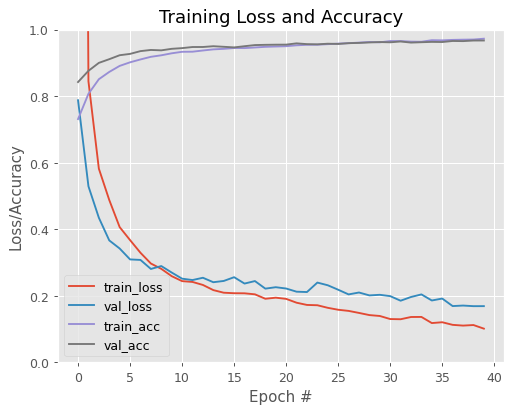

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H.history['loss']))
plt.plot(eje_x, H.history["loss"], label="train_loss")
plt.plot(eje_x, H.history["val_loss"], label="val_loss")
plt.plot(eje_x, H.history["accuracy"], label="train_acc")
plt.plot(eje_x, H.history["val_accuracy"], label="val_acc")
plt.ylim(0, 1)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Se va a visualizar las mismas gráficas con plotly

import plotly.graph_objects as go

eje_x = np.arange(0, len(H.history['loss']))

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=eje_x, y=H.history['loss'],
                    mode='lines+markers',
                    name='Train loss'))
fig.add_trace(go.Scatter(x=eje_x, y=H.history['accuracy'],
                    mode='lines+markers',
                    name='Train accuracy'))
fig.add_trace(go.Scatter(x=eje_x, y=H.history['val_loss'],
                    mode='lines+markers', name='Validation loss'))
fig.add_trace(go.Scatter(x=eje_x, y=H.history['val_accuracy'],
                    mode='lines+markers',
                    name='Validation accuracy'))
fig.update_layout(title='Entrenamiento',
                   xaxis_title='Épocas',
                   yaxis_title='Loss/Accuracy')

fig.show()

#### **Resultados cuantitativos (modelo final)**

Viendo las gráficas anteriores parece que no hay subajuste o sobreajuste por lo que nos quedamos con este modelo. Ahora vamos a evaluar la calidad del modelo final realizando la predicción con todas las imágenes del conjunto de test.

In [ ]:
# Vamos a comprobar que las clases están balanceadas en el conjunto de datos de test
print('[INFO]: Conjunto de datos de test')
numEjemplosPorClase(y_test)

# Evaluación del modelo final
print("\n[INFO]: Evaluando el modelo final...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training). Para cada ejemplo, se obtiene la probabilidad para cada clase
predictions = ann.predict(x_test, batch_size=256, verbose=1)

# Sacamos la matriz de confusión y el report para el conjunto de datos test
from sklearn.metrics import classification_report, confusion_matrix
print("\n [INFO]: Matriz de confusión (test)")
print(confusion_matrix(y_test_onehot.argmax(axis=1), predictions.argmax(axis=1)))
print("\n[INFO]: Report (test)")
print(classification_report(y_test_onehot.argmax(axis=1), predictions.argmax(axis=1)))

[INFO]: Conjunto de datos de test
La proporción de ejemplos para la clase 0 es 0.10
La proporción de ejemplos para la clase 1 es 0.11
La proporción de ejemplos para la clase 2 es 0.10
La proporción de ejemplos para la clase 3 es 0.10
La proporción de ejemplos para la clase 4 es 0.10
La proporción de ejemplos para la clase 5 es 0.09
La proporción de ejemplos para la clase 6 es 0.10
La proporción de ejemplos para la clase 7 es 0.10
La proporción de ejemplos para la clase 8 es 0.10
La proporción de ejemplos para la clase 9 es 0.10

[INFO]: Evaluando el modelo final...
40/40 [==============================] - 0s 5ms/step

 [INFO]: Matriz de confusión (test)
[[ 972    1    1    0    0    1    2    1    2    0]
 [   0 1122    4    1    0    2    4    0    2    0]
 [   4    4  997    6    2    2    1    8    8    0]
 [   0    0    4  987    0    5    0    6    7    1]
 [   1    2    5    2  954    0    6    4    2    6]
 [   1    0    1   20    2  853    7    2    2    4]
 [   4    3    0    

#### **Resultados cualitativos (modelo final)**

In [ ]:
# En primer lugar, convertimos las etiquetas predichas en one-hot encoding) a las etiquetas originales.
predictions_human_label = decodificar_onehot(predictions)


 Vamos a predecir la imagen 0, que tiene como etiqueta real el número 7


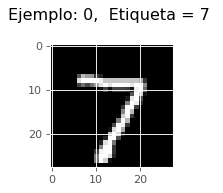



 Vamos a predecir la imagen 2, que tiene como etiqueta real el número 1


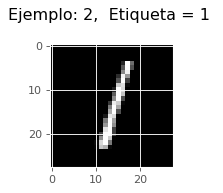

In [ ]:
print('\n', 'Vamos a predecir la imagen 0, que tiene como etiqueta real el número', y_test[0])
visualizar_digito(x_test, predictions_human_label, 0)

print('\n\n', 'Vamos a predecir la imagen 2, que tiene como etiqueta real el número', y_test[2])
visualizar_digito(x_test, predictions_human_label, 2)

### Guardar y cargar el modelo
Con el fin de ver cómo funciona el guardado de modelos, vamos a hacer una prueba en el almacenamiento virtual que nos ofrece Google Colab. La carpeta **Modelo** no existe, pero se creará cuando ejecutemos la función de guardar en ella.

In [ ]:
ann.save('/content/mi_primer_modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Ahora vamos a cargar el modelo en otro objeto diferente, ***ann_cargada***

In [ ]:
ann_cargada = tf.keras.models.load_model('/content/mi_primer_modelo.h5')

Veamos el summary del modelo cargado para comprobar que es el mismo.

In [ ]:
ann_cargada.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (

No sólo eso, sino que tendrá los pesos de la red entrenada. Por lo que podemos predecir directamente, sin necesidad de reentrenar.

In [ ]:
predictions_bis = ann_cargada.predict(x_test, batch_size=256, verbose=1)

40/40 [==============================] - 0s 4ms/step


Y el resultado de a matriz de confusión y del report debería ser el mismo.

In [ ]:
# Sacamos la matriz de confusión y el report para el conjunto de datos test
print("[INFO]: Matriz de confusión (ann_cargada, test)")
print(confusion_matrix(y_test_onehot.argmax(axis=1), predictions_bis.argmax(axis=1)))
print("\n[INFO]: Report (ann_cargada, test)")
print(classification_report(y_test_onehot.argmax(axis=1), predictions_bis.argmax(axis=1)))

[INFO]: Matriz de confusión (ann_cargada, test)
[[ 972    1    1    0    0    1    2    1    2    0]
 [   0 1122    4    1    0    2    4    0    2    0]
 [   4    4  997    6    2    2    1    8    8    0]
 [   0    0    4  987    0    5    0    6    7    1]
 [   1    2    5    2  954    0    6    4    2    6]
 [   1    0    1   20    2  853    7    2    2    4]
 [   4    3    0    0    3   10  935    0    2    1]
 [   1    8    9    1    1    0    0 1001    2    5]
 [   6    2    2    5    7   10    9    7  919    7]
 [   3    3    0   10   13    5    0   12    8  955]]

[INFO]: Report (ann_cargada, test)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.96      0.96       892
      

### Borrar modelos

Si hemos hecho varias pruebas, los modelos generados se van quedando de forma residual por detrás. No está demás saber que se puede hacer limpieza de los modelos:

In [ ]:
tf.keras.backend.clear_session()

### ¿Qué pasa si intentamos hacer el FIT sin convertir los datos a One - Hot encoding? Vamos a usar label encoding.

In [ ]:
# Creamos un nuevo objeto de ANN sin one-hot encoding
ann_sin_OH = ANN.build_model()
# Y lo ponemos a entrenar cambiando las etiquetas de y_train_onehot por las de y_train original
H_sin_OH = ann_sin_OH.fit(x_train, y_train, epochs=40, batch_size=256, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/40


ValueError: ignored

**Oh! oh! Parece que no funciona!**



Como habrás comprobado, aparece el siguiente error:

**`ValueError: Shapes (None, 1) and (None, 10) are incompatible`**

Y ocurre precísamente porque la red está compilada con una función de pérdidas (Entropía cruzada) que espera variables categóricas en fomato one-hot encoding. Esto pasa para las funciones `categorical_crossentropy` y `binary_crossentropy`.

Pero, **¿sabías que podemos RECOMPILAR el modelo sin tener que definirlo de nuevo?**

Hagámoslo, y en esta ocasión usaremos `sparse_categorical_crossentropy`, una función de pérdidas que sirve para poder usar los números enteros (como son los labels del dataset **MNIST**) o los labels a los que convierte LabelEncoder.

In [ ]:
ann_sin_OH.compile(Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
H_sin_OH = ann_sin_OH.fit(x_train, y_train, epochs=40, batch_size=256, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/40
188/188 [==============================] - 6s 22ms/step - loss: 5.2058 - accuracy: 0.7211 - val_loss: 0.7379 - val_accuracy: 0.8433
Epoch 2/40
188/188 [==============================] - 2s 12ms/step - loss: 0.8172 - accuracy: 0.8142 - val_loss: 0.4934 - val_accuracy: 0.8847
Epoch 3/40
188/188 [==============================] - 2s 9ms/step - loss: 0.5702 - accuracy: 0.8579 - val_loss: 0.4060 - val_accuracy: 0.9079
Epoch 4/40
188/188 [==============================] - 2s 10ms/step - loss: 0.4701 - accuracy: 0.8807 - val_loss: 0.3499 - val_accuracy: 0.9162
Epoch 5/40
188/188 [==============================] - 2s 10ms/step - loss: 0.3882 - accuracy: 0.8984 - val_loss: 0.3323 - val_accuracy: 0.9247
Epoch 6/40
188/188 [==============================] - 2s 9ms/step - loss: 0.3455 - accuracy: 0.9090 - val_loss: 0.3133 - val_accuracy: 0.9298
Epoch 7/40
188/188 [==============================] - 2s 12ms/step - loss: 0.3053 - accuracy: 0.9169 - val_loss: 0.2867 - val_accuracy: 0.9357
E

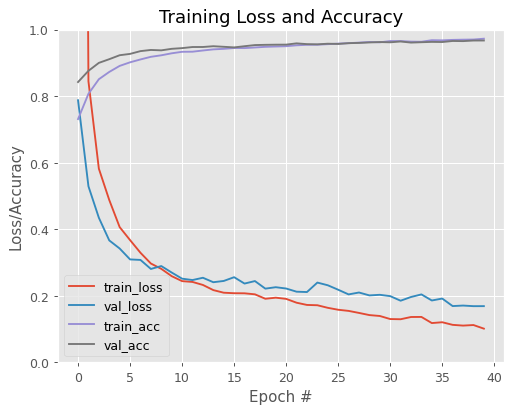

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H.history['loss']))
plt.plot(eje_x, H.history["loss"], label="train_loss")
plt.plot(eje_x, H.history["val_loss"], label="val_loss")
plt.plot(eje_x, H.history["accuracy"], label="train_acc")
plt.plot(eje_x, H.history["val_accuracy"], label="val_acc")
plt.ylim(0, 1)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluación del modelo final
print("[INFO]: Evaluando el modelo final...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions_sin_OH = ann_sin_OH.predict(x_test, batch_size=256, verbose=1)
# Tamaño de predictions_sin_OH
print("\n[INFO]: Tamaño de predictions_sin_OH")
print(predictions_sin_OH.shape)
print("[INFO]: Predicción para el ejemplo 0")
print(predictions_sin_OH[0])
print("[INFO]: Ground truth (salida esperada) para el ejemplo 0")
print(y_test[0])

# Obtenemos, para cada ejemplo, la posición de la máxima probabilidad
predictions_labelEncoding = predictions_sin_OH.argmax(axis=1)
print('[INFO]: Clase predecida para ejemplo 0: ', predictions_labelEncoding[0])
# Sacamos el report para el conjunto de datos de test
print("\n[INFO]: Report (test)")
print(classification_report(y_test, predictions_labelEncoding))

[INFO]: Evaluando el modelo final...
40/40 [==============================] - 0s 4ms/step

[INFO]: Tamaño de predictions_sin_OH
(10000, 10)
[INFO]: Predicción para el ejemplo 0
[9.8718023e-26 1.6458451e-20 4.1905346e-12 5.7600544e-13 1.2898881e-21
 3.3740804e-20 7.2651884e-28 9.9999994e-01 4.8286507e-20 1.6537093e-12]
[INFO]: Ground truth (salida esperada) para el ejemplo 0
7
[INFO]: Clase predecida para ejemplo 0:  7

[INFO]: Report (test)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.95      0.95       892
           6       0.98      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.94      0.95       974
           9  

### **Programar una red neuronal por el MÉTODO SECUENCIAL**

Conviene saber que no sólo se puede programar una red por el **MÉTODO FUNCIONAL** como hemos hecho antes. Si no que también se pueden crear de forma secuencial, aunque para redes complejas no suele emplearse este método.

Hay dos formas de definir el modelo secuencial:

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam # Existen otros optimizadores como SGD y RMSprop

# Definiendo el modelo secuencial 1: Todo dentro de la misma secuencia separado por comas (,)
class ANN_Sequential_1:
  def build_model():
    model = Sequential([
            Input((28, 28)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(128),
            Activation('relu'),
            Dense(10, activation='softmax')
            ])

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Definiendo el modelo secuencial 2: Que trata de añadir cada capa al modelo.

class ANN_Sequential_2:
  def build_model():
    model = Sequential()
    model.add(Input((28, 28)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Veamos el summary de los modelos:

In [ ]:
ann_sec_1 = ANN_Sequential_1.build_model()
ann_sec_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118

In [ ]:
ann_sec_2 = ANN_Sequential_2.build_model()
ann_sec_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 activation_5 (Activation)   (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118

Comprobemos que se entrena igual que en el modelo FUNCIONAL y que ofrece resultados similares.

In [ ]:
H_sec_1 = ann_sec_1.fit(x_train, y_train_onehot, epochs=40, batch_size=256, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/40
188/188 [==============================] - 4s 15ms/step - loss: 6.8687 - accuracy: 0.6869 - val_loss: 0.8240 - val_accuracy: 0.8272
Epoch 2/40
188/188 [==============================] - 3s 16ms/step - loss: 0.9165 - accuracy: 0.7904 - val_loss: 0.5779 - val_accuracy: 0.8650
Epoch 3/40
188/188 [==============================] - 4s 21ms/step - loss: 0.6479 - accuracy: 0.8381 - val_loss: 0.4617 - val_accuracy: 0.8977
Epoch 4/40
188/188 [==============================] - 3s 17ms/step - loss: 0.5282 - accuracy: 0.8662 - val_loss: 0.3914 - val_accuracy: 0.9092
Epoch 5/40
188/188 [==============================] - 2s 9ms/step - loss: 0.4463 - accuracy: 0.8835 - val_loss: 0.3670 - val_accuracy: 0.9153
Epoch 6/40
188/188 [==============================] - 2s 10ms/step - loss: 0.3945 - accuracy: 0.8951 - val_loss: 0.3222 - val_accuracy: 0.9240
Epoch 7/40
188/188 [==============================] - 2s 10ms/step - loss: 0.3655 - accuracy: 0.9034 - val_loss: 0.3105 - val_accuracy: 0.9286


In [ ]:
H_sec_2 = ann_sec_2.fit(x_train, y_train_onehot, epochs=40, batch_size=256, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/40
188/188 [==============================] - 3s 11ms/step - loss: 5.8479 - accuracy: 0.7221 - val_loss: 0.8017 - val_accuracy: 0.8282
Epoch 2/40
188/188 [==============================] - 2s 9ms/step - loss: 0.8428 - accuracy: 0.8080 - val_loss: 0.5495 - val_accuracy: 0.8737
Epoch 3/40
188/188 [==============================] - 2s 10ms/step - loss: 0.6013 - accuracy: 0.8508 - val_loss: 0.4277 - val_accuracy: 0.8980
Epoch 4/40
188/188 [==============================] - 3s 14ms/step - loss: 0.4828 - accuracy: 0.8746 - val_loss: 0.3651 - val_accuracy: 0.9147
Epoch 5/40
188/188 [==============================] - 2s 12ms/step - loss: 0.4085 - accuracy: 0.8929 - val_loss: 0.3466 - val_accuracy: 0.9165
Epoch 6/40
188/188 [==============================] - 2s 10ms/step - loss: 0.3686 - accuracy: 0.9012 - val_loss: 0.3173 - val_accuracy: 0.9253
Epoch 7/40
188/188 [==============================] - 2s 9ms/step - loss: 0.3292 - accuracy: 0.9094 - val_loss: 0.2798 - val_accuracy: 0.9326
E

In [ ]:
# Sacamos el report para el conjunto de datos de test del modelo secuencial 1
predictions_sec_1 = ann_sec_1.predict(x_test, batch_size=256, verbose=1)
print("\n[INFO]: Report (test, secuencial 1)")
print(classification_report(y_test_onehot.argmax(axis=1), predictions_sec_1.argmax(axis=1)))

40/40 [==============================] - 0s 5ms/step

[INFO]: Report (test, secuencial 1)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.96      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.94      0.94       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [ ]:
# Sacamos el report para el conjunto de datos de test del modelo secuencial 2
predictions_sec_2 = ann_sec_2.predict(x_test, batch_size=256, verbose=1)
print("\n[INFO]: Report (test, secuencial 2)")
print(classification_report(y_test_onehot.argmax(axis=1), predictions_sec_2.argmax(axis=1)))

40/40 [==============================] - 0s 5ms/step

[INFO]: Report (test, secuencial 2)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.94      0.95       892
           6       0.98      0.96      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.93      0.96      0.95       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Lo has conseguido!** Ya eres un experto en MLP (multilayer perceptron).

Si has llegado hasta aquí, es que has adquirido todos los conocimientos necesarios para empezar a crear tus propias redes neuronales como vas a hacer en el siguiente ejercicio.
<br></br>


## **<u>Ejercicio 2: CONJUNTO DE DATOS CIFAR10</u>**

Otro dataset ampliamente conocido es el **CIFAR10**. Dicho conjunto de datos se compone de **60000 imágenes RGB** de dimensiones **32x32** pertenecientes a **10 clases distintas** (6000 imágenes por clase). **CIFAR10** se separa en dos subconjuntos de datos: **50000** imágenes para **entrenamiento** y las **10000** restantes se emplean como conjunto de datos de **test**.

In [1]:
# Reinicia entorno de ejecución (Entorno de ejecución -> Reiniciar entorno de ejecución)

# Cargamos el dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [2]:
# Organización de los datos
print('Número de ejemplos/observaciones (imágenes) del conjunto de entrenamiento:', len(y_train))
print('Número de ejemplos/observaciones (imágenes) del conjunto de test:', len(y_test))
print('Las imágenes son arrays de tamaño:', x_train[0].shape)
print('Las etiquetas son arrays de tamaño', y_train[0].shape, ', es decir, tienen 1 valor que para el ejemplo 0 vale', y_train[0][0])

Número de ejemplos/observaciones (imágenes) del conjunto de entrenamiento: 50000
Número de ejemplos/observaciones (imágenes) del conjunto de test: 10000
Las imágenes son arrays de tamaño: (32, 32, 3)
Las etiquetas son arrays de tamaño (1,) , es decir, tienen 1 valor que para el ejemplo 0 vale 6


In [3]:
# Visualicemos las etiquetas
import numpy as np
print('Las etiquetas son: ', np.unique(y_train))

Las etiquetas son:  [0 1 2 3 4 5 6 7 8 9]


Igual que con MNIST, el dataset viene preparado para que usemos directamente las etiquetas con `sparse_categorical_crossentropy` porque utiliza label encoding.

Ahora que tenemos en memoria el dataset de CIFAR10, lo primero que vamos a hacer es **mostrar unas cuantas imágenes** para visualizar la **variabilidad** existente:


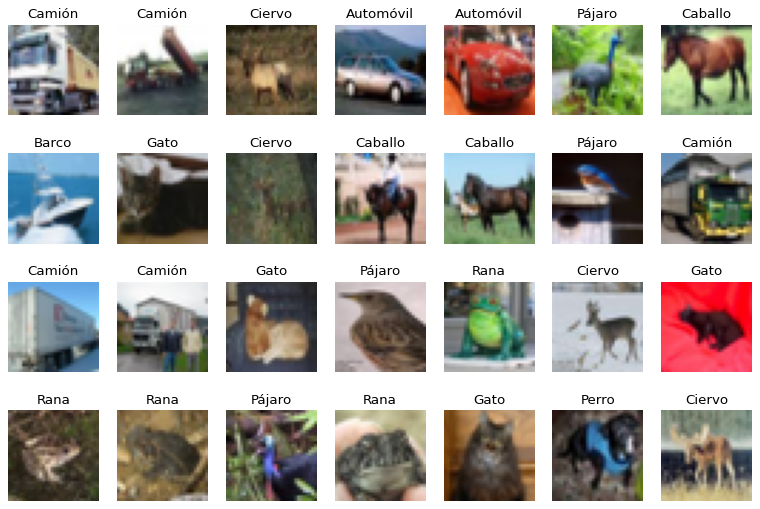

In [4]:
# Como éste es un dataset conocido, vamos a ponerle su etiqueta escrita, en lugar de la numérica con la que viene.
etiquetas_humanas = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

import matplotlib.pyplot as plt

# Vamos a visualizar las primeras 28 imágenes
fig = plt.figure(figsize=(12,8), dpi=80)
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(etiquetas_humanas[y_train[n][0]])
    plt.axis('off')

Como puedes ver, no son las imágenes con más calidad de mundo. Pero sirven para poder entrenar una red neuronal.

Antes de crear tu primera red neuronal, comprueba que las clases de los conjuntos de entrenamiento (80% primero de x_train), validación (20% final de x_train) y de test están bien balanceados. Como hemos reiniciado el entorno de de ejecución copia la definición de la función
numEjemplosPorClase para poder usar esta función ahora.

In [5]:
def numEjemplosPorClase(y):
  numClases = np.unique(y)
  for clase in numClases:
    numEjemplosClase = np.sum(y == clase)
    print('La proporción de ejemplos para la clase %d es %.2f' %(clase, numEjemplosClase/len(y)))

print('-Conjunto de datos de entrenamiento')
fin = int(len(y_train)*0.8)
numEjemplosPorClase(y_train[0:fin])
print('\n-Conjunto de datos de validación')
ini = fin
fin = len(y_train)
numEjemplosPorClase(y_train[ini:fin])
print('\n-Conjunto de datos de test')
numEjemplosPorClase(y_test)

-Conjunto de datos de entrenamiento
La proporción de ejemplos para la clase 0 es 0.10
La proporción de ejemplos para la clase 1 es 0.10
La proporción de ejemplos para la clase 2 es 0.10
La proporción de ejemplos para la clase 3 es 0.10
La proporción de ejemplos para la clase 4 es 0.10
La proporción de ejemplos para la clase 5 es 0.10
La proporción de ejemplos para la clase 6 es 0.10
La proporción de ejemplos para la clase 7 es 0.10
La proporción de ejemplos para la clase 8 es 0.10
La proporción de ejemplos para la clase 9 es 0.10

-Conjunto de datos de validación
La proporción de ejemplos para la clase 0 es 0.10
La proporción de ejemplos para la clase 1 es 0.10
La proporción de ejemplos para la clase 2 es 0.10
La proporción de ejemplos para la clase 3 es 0.10
La proporción de ejemplos para la clase 4 es 0.10
La proporción de ejemplos para la clase 5 es 0.10
La proporción de ejemplos para la clase 6 es 0.10
La proporción de ejemplos para la clase 7 es 0.10
La proporción de ejemplos para

1) Puedes empezar a crear y generar tu red neuronal MLP para resolver el problema de clasificación de CIFAR10 copiando una de las arquitecturas del Ejercicio 1 y puedes usar el método que más cómodo te sea: El FUNCIONAL o el SECUENCIAL (1 o 2). Recuerda importar las librerías/funciones que necesites (ya que hemos reiniciado el entorno de ejecución), construir el modelo, entrenarlo, mirar las gráficas de entrenamiento (y validación), ...



In [6]:
# Cargar librerías numpy, matplotlib y tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop # Existen otros optimizadores como SGD y RMSprop

# Definiendo el modelo secuencial 1: Todo dentro de la misma secuencia separado por comas (,)
class ANN_Sequential_1:
  def build_model():
    model = Sequential([
            Input((32, 32, 3)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(128),
            Activation('relu'),
            Dense(10, activation='softmax')
            ])

    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [8]:
ann_sec_1 = ANN_Sequential_1.build_model()
ann_sec_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411146 (1.57 MB)
Trainable params: 411146 

In [9]:
H_sec_1 = ann_sec_1.fit(x_train, y_train, epochs=40, batch_size=256, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/40
157/157 [==============================] - 8s 8ms/step - loss: 22.6865 - accuracy: 0.1014 - val_loss: 2.3037 - val_accuracy: 0.0952
Epoch 2/40
157/157 [==============================] - 1s 4ms/step - loss: 2.3031 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/40
157/157 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/40
157/157 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/40
157/157 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/40
157/157 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch

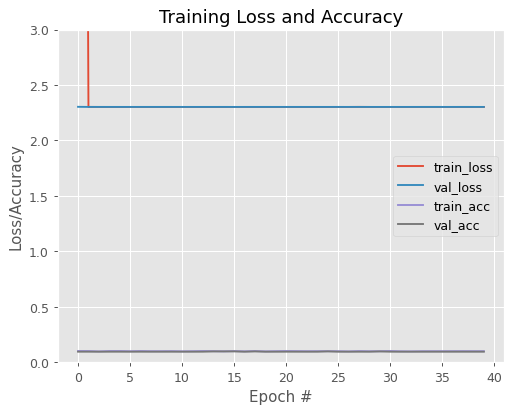

In [10]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H_sec_1.history['loss']))
plt.plot(eje_x, H_sec_1.history["loss"], label="train_loss")
plt.plot(eje_x, H_sec_1.history["val_loss"], label="val_loss")
plt.plot(eje_x, H_sec_1.history["accuracy"], label="train_acc")
plt.plot(eje_x, H_sec_1.history["val_accuracy"], label="val_acc")
plt.ylim(0, 3)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

2) ¿Puedes conseguir un accuracy del conjunto de datos de validación alrededor de 0.51? Si no lo consigues haz los siguientes cambios:
- Normaliza las características dividiendo tanto x_train como x_test por 255.0 (escalado MinMax, el mínimo es 0). Las entradas no serán numpy array de tipo uint sino de tipo float64. Llama a estas nuevas variables x_train_norm y x_test_norm y entrena con x_train_norm en vez de x_train.

  *1s 7ms/step - loss: 1.4794 - accuracy: 0.4687 - val_loss: 1.5162 - val_accuracy: 0.4667*

- Cambia el optimizador a SGD y RMSprop

  *1s 5ms/step - loss: 1.8779 - accuracy: 0.3331 - val_loss: 1.8547 - val_accuracy: 0.3449* con SGD

  *1s 5ms/step - loss: 1.5073 - accuracy: 0.4613 - val_loss: 1.5496 - val_accuracy: 0.4620* con RMSprop

- Incrementa el número de épocas (por ejemplo, a 100)

  *1s 5ms/step - loss: 1.4165 - accuracy: 0.4876 - val_loss: 1.4902 - val_accuracy: 0.4737*


- Incrementa el número de neuronas de la primera capa oculta (por ejemplo, 256, 512, 1024) y de la segunda capa oculta (256).

  *1s 6ms/step - loss: 1.2069 - accuracy: 0.5655 - val_loss: 1.3927 - val_accuracy: 0.5123*



In [11]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# Definiendo el modelo secuencial 1: Todo dentro de la misma secuencia separado por comas (,)
class ANN_Sequential_2:
  def build_model():
    model = Sequential([
            Input((32, 32, 3)),
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.2),
            Dense(256),
            Activation('relu'),
            Dense(10, activation='softmax')
            ])

    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

ann_sec_2 = ANN_Sequential_2.build_model()
ann_sec_2.summary()

H_sec_2 = ann_sec_2.fit(x_train_norm, y_train, epochs=40, batch_size=256, verbose=1, validation_split=0.2, shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 3411722 (13.01 MB)
Trainable params: 341

3) Cuando tengas tu modelo final (el que te dé mejores resultados con el conjunto de datos de validación), evalúa este modelo final con el conjunto de datos de test (matriz de confusión e informe) y prueba a visualizar alguna imagen del conjunto de datos test, su clase esperada y la predecida.
<br>
<br>
Al final verás que no hemos sido capaces de obtener tan buen accuracy como en el caso de MNIST ya que CIFAR10 es conjunto de datos más complejo. Pero a lo mejor lo puedes mejorar próximamente...

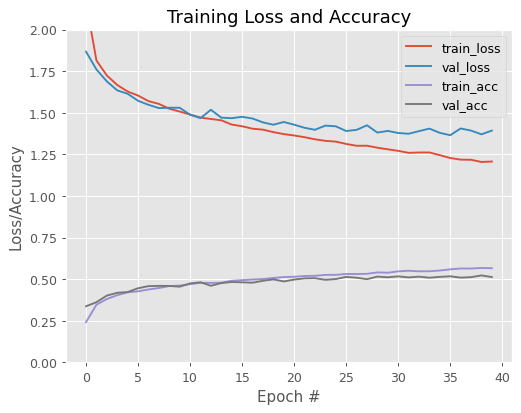

In [12]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H_sec_2.history['loss']))
plt.plot(eje_x, H_sec_2.history["loss"], label="train_loss")
plt.plot(eje_x, H_sec_2.history["val_loss"], label="val_loss")
plt.plot(eje_x, H_sec_2.history["accuracy"], label="train_acc")
plt.plot(eje_x, H_sec_2.history["val_accuracy"], label="val_acc")
plt.ylim(0,2)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [13]:
# Evaluación del modelo final
print("[INFO]: Evaluando el modelo final...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = ann_sec_2.predict(x_test_norm, batch_size=256, verbose=1)
# Tamaño de predictions_sin_OH
print("\n[INFO]: Tamaño de predictions_sin_OH")
print(predictions.shape)
print("[INFO]: Predicción para el ejemplo 0")
print(predictions[0])
print("[INFO]: Ground truth (salida esperada) para el ejemplo 0")
print(y_test[0])


# Sacamos la matriz de confusión y el report para el conjunto de datos test
from sklearn.metrics import classification_report, confusion_matrix
# Obtenemos, para cada ejemplo, la posición de la máxima probabilidad
predictions_labelEncoding = predictions.argmax(axis=1)
print('[INFO]: Clase predecida para ejemplo 0: ', predictions_labelEncoding[0])

# Sacamos el report para el conjunto de datos de test
print("\n[INFO]: Report (test)")
print(classification_report(y_test, predictions_labelEncoding))

# Sacamos la matriz de confusión
print("[INFO]: Matriz de confusión (ann_cargada, test)")
print(confusion_matrix(y_test, predictions.argmax(axis=1)))

[INFO]: Evaluando el modelo final...
40/40 [==============================] - 0s 3ms/step

[INFO]: Tamaño de predictions_sin_OH
(10000, 10)
[INFO]: Predicción para el ejemplo 0
[0.03417717 0.0403311  0.01587101 0.22631545 0.16912869 0.05379171
 0.03121364 0.00329061 0.40250352 0.0233771 ]
[INFO]: Ground truth (salida esperada) para el ejemplo 0
[3]
[INFO]: Clase predecida para ejemplo 0:  8

[INFO]: Report (test)
              precision    recall  f1-score   support

           0       0.62      0.52      0.56      1000
           1       0.68      0.62      0.65      1000
           2       0.42      0.39      0.40      1000
           3       0.42      0.32      0.36      1000
           4       0.39      0.53      0.45      1000
           5       0.49      0.35      0.41      1000
           6       0.62      0.49      0.55      1000
           7       0.53      0.63      0.58      1000
           8       0.53      0.75      0.62      1000
           9       0.57      0.59      0.5

**PREGUNTA 3: ¿Las clases de los conjuntos de datos de entrenamiento, validación y test están balanceadas? ¿Ha mejorado la red al normalizar las características (valores de los píxeles de las imágenes? ¿Y al cambiar el optimizador? ¿y al cambiar el número de épocas? ¿Y al cambiar el número de neuronas de la primera y segunda capa ocultas? ¿Qué accuracy has obtenido con tu modelo final (especifica qué has elegido al final: optimizador, épocas, número de neuronas...) con el conjunto de datos de entrenamiento, validación y test? Compara estos valores de accuracy y explica por qué uno es mayor que los otros... ¿Qué clase se equivoca menos y más con el conjunto de datos de test (mira la métrica f1-score)?**

**Respuesta:**

**¿Las clases de los conjuntos de datos de entrenamiento, validación y test están balanceadas?**

Sí lo están, porque la proporción es 0.1 para cada clase


**¿Ha mejorado la red al normalizar las características (valores de los píxeles de las imágenes)?**

Sí ha mejorado, pasando de 0.0952 a 0.4667

**¿Y al cambiar el optimizador?**

No, al cambiar por SGD y RMSprop se obtienen peores resultados (0.3449 y 0.4620)

**¿y al cambiar el número de épocas?**

No, porque al aumentar el número de épocas empieza a oscilar alrededor del mínimo, no mejorando el resultado con respecto a 40 épocas.

**¿Y al cambiar el número de neuronas de la primera y segunda capa ocultas?**

Al cambiar el número de neuronas se obtiene una mejoría, obteniendo el valor máximo con 1024 en la primera capa oculta y 256 en la segunda capa oculta.

**¿Qué accuracy has obtenido con tu modelo final (especifica qué has elegido al final: optimizador, épocas, número de neuronas...) con el conjunto de datos de entrenamiento, validación y test?**

Optimizador: Adam(0.001)

Número de épocas: 40

Número de neuronas: 1024 y 256

Accuracy train: 0.5655

Accuracy validación: 0.5123

Accuracy test: 0.52

**Compara estos valores de accuracy y explica por qué uno es mayor que los otros**

Es mayor con el conjunto de entrenamiento que con el resto porque los pesos de la red neuronal se calculan con dicho conjunto de datos.

**¿Qué clase se equivoca menos y más con el conjunto de datos de test (mira la métrica f1-score)?**

Se equivoca menos con 1 (Automóvil, f1-score de 0.65) y más con 3 (Gato, f1-score de 0.36)